In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

In [2]:
data = pd.read_csv('ccy1996_to_2023.csv')
data.set_index('Date', inplace=True)

In [3]:
data['AUD='] = 1 / data['AUD='] 
data['NZD='] = 1 / data['NZD='] 
data['EUR='] = 1 / data['EUR='] 
data['GBP='] = 1 / data['GBP='] 

In [4]:
corr = data.corr()

<AxesSubplot:>

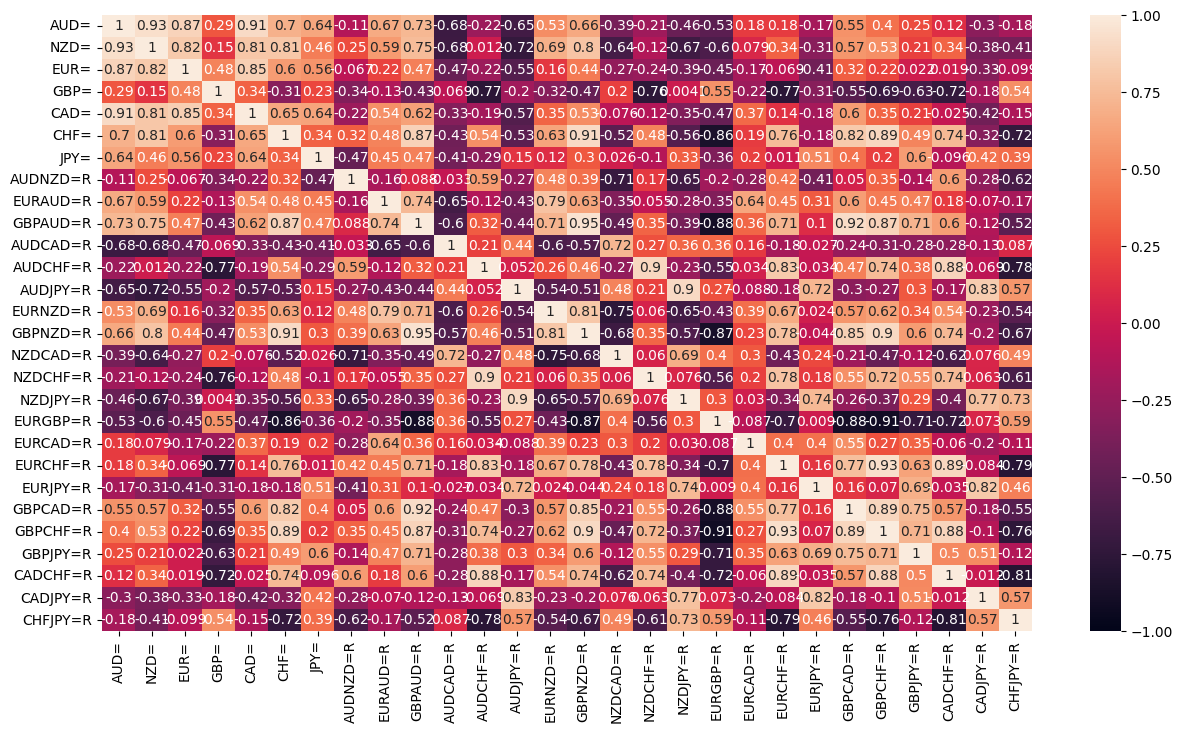

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [25.0, 25.0, 50.0, 50.0],
  [10.0, 10.0, 37.5, 37.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [82.5, 82.5, 113.75, 113.75],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [161.25, 161.25, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [185.625, 185.625, 251.25, 251.25],
  [98.125, 98.125, 218.4375, 218.4375],
  [23.75, 23.75, 158.28125, 158.28125]],
 'dcoord': [[0.0, 0.4000653528584084, 0.4000653528584084, 0.0],
  [0.0, 0.09588752991008742, 0.09588752991008742, 0.0],
  [0.0, 0.18281

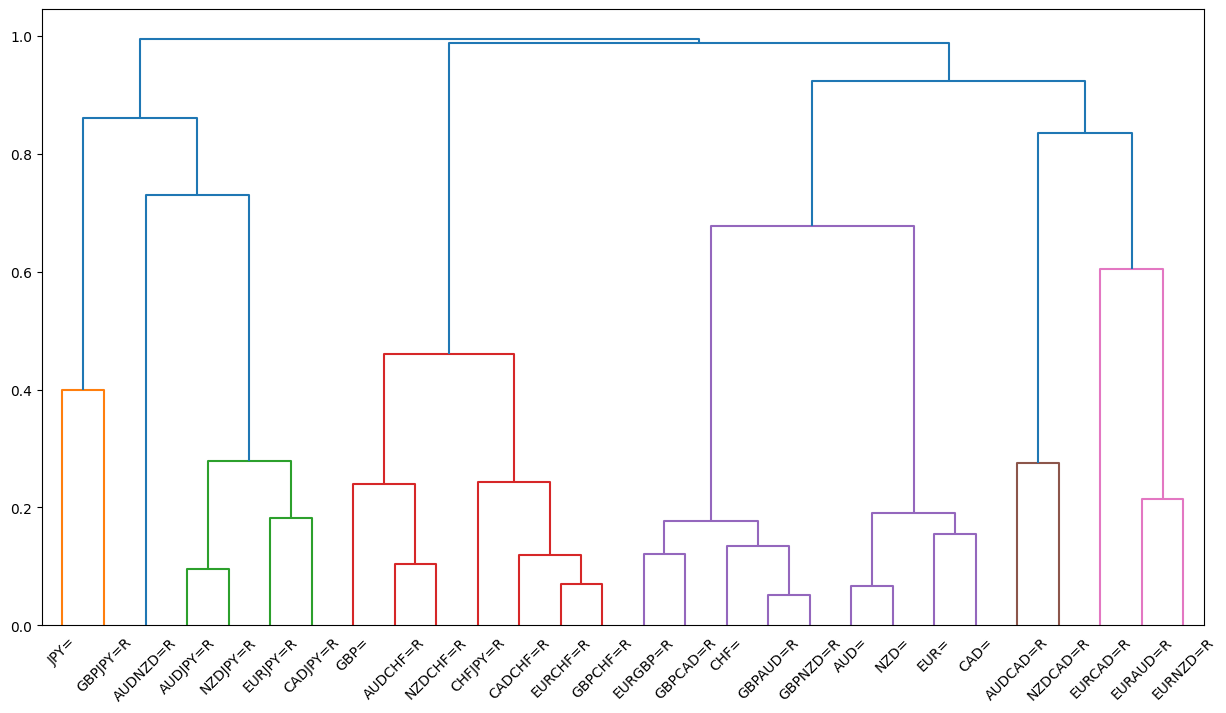

In [6]:
plt.figure(figsize=(15,8))
diss = 1 - abs(corr)
Z = linkage(squareform(diss), 'complete')

dendrogram(Z, labels=data.columns, orientation='top', leaf_rotation=45)

In [11]:
threshold = 0.85
labels = fcluster(Z, threshold, criterion='distance')

labels

array([4, 4, 4, 3, 4, 4, 1, 2, 5, 4, 5, 3, 2, 5, 4, 5, 3, 2, 4, 5, 3, 2,
       4, 3, 1, 3, 2, 3], dtype=int32)

In [12]:
cut_data = pd.DataFrame(index = data.columns, data=labels)

In [13]:
cut_data.rename(columns={0:'cluster'}, inplace=True)

In [21]:
for i in range(1,6):
    print(cut_data[cut_data['cluster']==i].head())

          cluster
JPY=            1
GBPJPY=R        1
          cluster
AUDNZD=R        2
AUDJPY=R        2
NZDJPY=R        2
EURJPY=R        2
CADJPY=R        2
          cluster
GBP=            3
AUDCHF=R        3
NZDCHF=R        3
EURCHF=R        3
GBPCHF=R        3
      cluster
AUD=        4
NZD=        4
EUR=        4
CAD=        4
CHF=        4
          cluster
EURAUD=R        5
AUDCAD=R        5
EURNZD=R        5
NZDCAD=R        5
EURCAD=R        5


In [18]:
cut_data

,cluster
AUD=,4
NZD=,4
EUR=,4
GBP=,3
CAD=,4
CHF=,4
JPY=,1
AUDNZD=R,2
EURAUD=R,5
GBPAUD=R,4


In [22]:
data2 = data
data2.head()

,AUD=,NZD=,EUR=,GBP=,CAD=,CHF=,JPY=,AUDNZD=R,EURAUD=R,GBPAUD=R,...,EURGBP=R,EURCAD=R,EURCHF=R,EURJPY=R,GBPCAD=R,GBPCHF=R,GBPJPY=R,CADCHF=R,CADJPY=R,CHFJPY=R
Date,,,,,,,,,,,,,,,,,,,,,
1996-01-05,1.337345,1.520797,0.778634,0.644122,1.35835,1.16150,105.410,1.13720,1.71755,2.07625,...,0.82725,1.7445,1.49170,135.235,2.10885,1.80325,163.48,0.85510,77.52,90.655
1996-01-12,1.344990,1.508637,0.780457,0.646621,1.36305,1.16300,105.250,1.12165,1.72335,2.07875,...,0.82850,1.7466,1.49015,134.855,2.10810,1.79855,162.77,0.85315,77.23,90.525
1996-01-19,1.359897,1.505457,0.802504,0.663350,1.36600,1.19230,105.345,1.10705,1.69455,2.05005,...,0.82660,1.7022,1.48570,131.275,2.05925,1.79735,158.81,0.87285,77.12,88.355
1996-01-26,1.356208,1.499813,0.815993,0.665779,1.38175,1.21100,106.650,1.10585,1.66205,2.03705,...,0.81590,1.6933,1.48410,130.695,2.07540,1.81895,160.19,0.87640,77.18,88.065
1996-02-02,1.319871,1.477432,0.807559,0.656039,1.37595,1.21445,106.450,1.11935,1.63440,2.01190,...,0.81240,1.7038,1.50385,131.815,2.09735,1.85120,162.26,0.88265,77.36,87.655


In [24]:
data2_r = data2.pct_change().dropna()

In [25]:
corr2 = data2_r.corr()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [40.0, 40.0, 70.0, 70.0],
  [12.5, 12.5, 55.0, 55.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [110.0, 110.0, 150.0, 150.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [220.0, 220.0, 251.25, 251.25],
  [205.0, 205.0, 235.625, 235.625],
  [182.5, 182.5, 220.3125, 220.3125],
  [130.0, 130.0, 201.40625, 201.40625],
  [33.75, 33.75, 165.703125, 165.703125]],
 'dcoord': [[0.0, 0.17874251249314543, 0.17874251249314543, 0.0],
  [0.0, 0.4101957415074863, 0.4101957415074863, 0.178742512493145

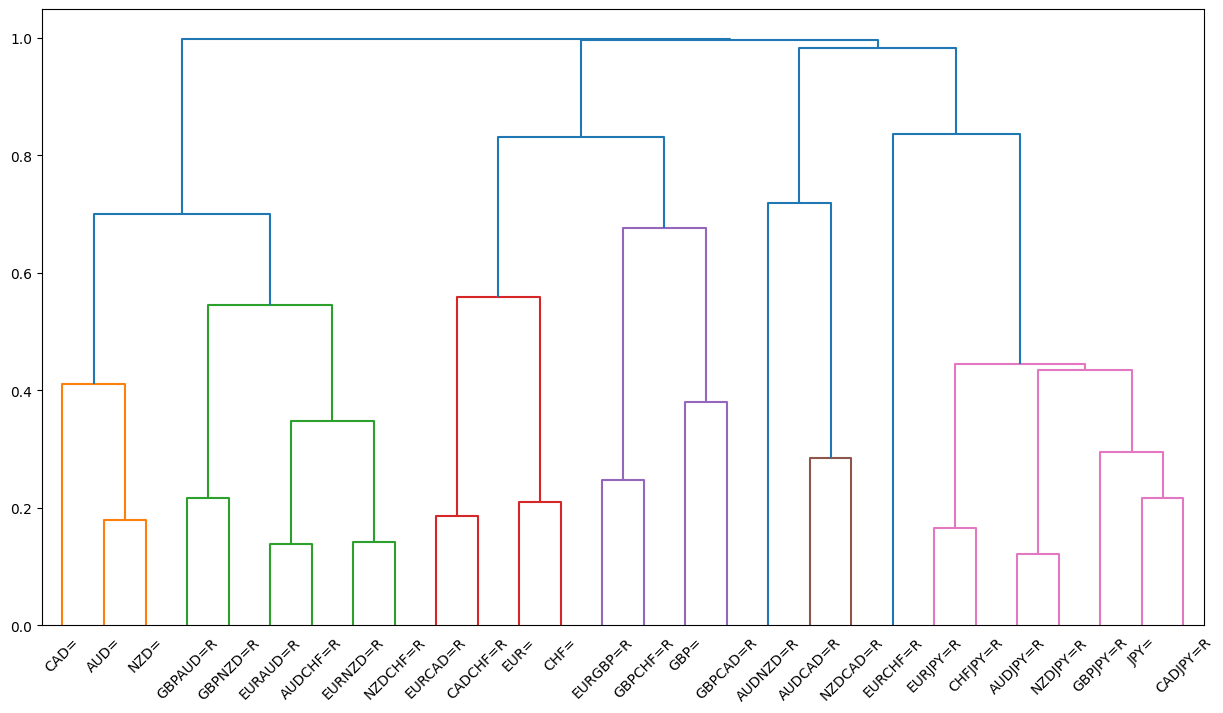

In [26]:
plt.figure(figsize=(15,8))
diss2 = 1 - abs(corr2)
Z2 = linkage(squareform(diss2), 'complete')

dendrogram(Z2, labels=data2.columns, orientation='top', leaf_rotation=45)

In [37]:
threshold2 = 0.85
labels2 = fcluster(Z2, threshold2, criterion='distance')

labels2

array([1, 1, 2, 2, 1, 2, 4, 3, 1, 1, 3, 1, 4, 1, 1, 3, 1, 4, 2, 2, 4, 4,
       2, 2, 4, 2, 4, 4], dtype=int32)

In [38]:
cut_data2 = pd.DataFrame(index = data2.columns, data=labels2)
cut_data2.rename(columns={0:'cluster'}, inplace=True)
for i in range(1,5):
    print(cut_data2[cut_data2['cluster']==i])

          cluster
AUD=            1
NZD=            1
CAD=            1
EURAUD=R        1
GBPAUD=R        1
AUDCHF=R        1
EURNZD=R        1
GBPNZD=R        1
NZDCHF=R        1
          cluster
EUR=            2
GBP=            2
CHF=            2
EURGBP=R        2
EURCAD=R        2
GBPCAD=R        2
GBPCHF=R        2
CADCHF=R        2
          cluster
AUDNZD=R        3
AUDCAD=R        3
NZDCAD=R        3
          cluster
JPY=            4
AUDJPY=R        4
NZDJPY=R        4
EURCHF=R        4
EURJPY=R        4
GBPJPY=R        4
CADJPY=R        4
CHFJPY=R        4
